# Multiple Regression of Toyota Corolla 2nd Hand Car Data 

# Multiple Regression of Toyota Corolla 2nd Hand Car Data 

In [ ]:
# In this Project We received a data from 2nd Hand Car Dealear where we have train the model & pred data using multiple linear regression - 

In [1]:
## Importing the Libralies - 
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
# Importing the data from our system 
data = pd.read_csv("D:/Top Mentor/Classes Details/07th April 2024/Assignment/Project - 3&4_Multiple_Reg/ToyotaCorolla.csv" , encoding='ISO-8859-1')
print(data.head(2))

   Id                                          Model  ...  Radio_cassette  Tow_Bar
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0

[2 rows x 38 columns]


In [10]:
## Firstly We have to copy this data as our data keep safe - 
df = data.copy()
print(df.head(2))

   Id                                          Model  ...  Radio_cassette  Tow_Bar
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0

[2 rows x 38 columns]


In [11]:
## Reading data & Checking basic features of data - 
print('DataSet Information -\n',df.describe())

DataSet Information -
                 Id         Price  ...  Radio_cassette      Tow_Bar
count  1436.000000   1436.000000  ...     1436.000000  1436.000000
mean    721.555014  10730.824513  ...        0.145543     0.277855
std     416.476890   3626.964585  ...        0.352770     0.448098
min       1.000000   4350.000000  ...        0.000000     0.000000
25%     361.750000   8450.000000  ...        0.000000     0.000000
50%     721.500000   9900.000000  ...        0.000000     0.000000
75%    1081.250000  11950.000000  ...        0.000000     1.000000
max    1442.000000  32500.000000  ...        1.000000     1.000000

[8 rows x 35 columns]


In [13]:
#  Checking Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [26]:
# Checking Null Value -
df.isnull().sum()

Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [37]:
## We have to take correlation SHip so we are removing the Objects data type column from data - 
df.drop(['Fuel_Type','Color'],axis=1,inplace=True)

In [38]:
df.columns

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [41]:
# Check Correlation For Features Selection
df.corr()["Price"]

Price               1.000000
Age_08_04          -0.876590
Mfg_Month          -0.018138
Mfg_Year            0.885159
KM                 -0.569960
HP                  0.314990
Met_Color           0.108905
Automatic           0.033081
cc                  0.126389
Doors               0.185326
Cylinders                NaN
Gears               0.063104
Quarterly_Tax       0.219197
Weight              0.581198
Mfr_Guarantee       0.197802
BOVAG_Guarantee     0.028133
Guarantee_Period    0.146627
ABS                 0.306138
Airbag_1            0.093588
Airbag_2            0.248974
Airco               0.429259
Automatic_airco     0.588262
Boardcomputer       0.601292
CD_Player           0.481374
Central_Lock        0.343458
Powered_Windows     0.356518
Power_Steering      0.064275
Radio              -0.041887
Mistlamps           0.222083
Sport_Model         0.164121
Backseat_Divider    0.102569
Metallic_Rim        0.108564
Radio_cassette     -0.043179
Tow_Bar            -0.172369
Name: Price, d

In [ ]:
# We Selecting  Features : Mfg_Year, Weight, Gears , Automatic_airco, Boardcomputer  Corr > 0.50

In [42]:
df.drop(['Age_08_04','Mfg_Month','KM','HP','Met_Color','Automatic','cc','Doors','Quarterly_Tax','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1,inplace=True)

In [47]:
df.drop(['Cylinders'],axis=1,inplace=True)  ## Corr is less than 0.50 all cloumn from the data now we checkin our data & doing analysis on first -

In [48]:
df.columns

Index(['Price', 'Mfg_Year', 'Gears', 'Weight', 'Automatic_airco',
       'Boardcomputer'],
      dtype='object')

In [51]:
## Data Reading Basic Steps :-
print('Min Price of Car- ',df['Price'].min())
print('Max Price of Car - ',df['Price'].max())
print('Min Gears - ',df['Gears'].min())
print('Max Gears - ',df['Gears'].max())
print('no of columns - \n' , df.columns)
print('no of shapes - ' , df.shape)
print('no of lenght - ' , len(df))
print('no of datatype - \n' , df.dtypes)

Min Price of Car-  4350
Max Price of Car -  32500
Min Gears -  3
Max Gears -  6
no of columns - 
 Index(['Price', 'Mfg_Year', 'Gears', 'Weight', 'Automatic_airco',
       'Boardcomputer'],
      dtype='object')
no of shapes -  (1436, 6)
no of lenght -  1436
no of datatype - 
 Price              int64
Mfg_Year           int64
Gears              int64
Weight             int64
Automatic_airco    int64
Boardcomputer      int64
dtype: object


In [52]:
print('DataSet Information -\n',df.describe())

DataSet Information -
               Price     Mfg_Year  ...  Automatic_airco  Boardcomputer
count   1436.000000  1436.000000  ...      1436.000000    1436.000000
mean   10730.824513  1999.625348  ...         0.056407       0.294568
std     3626.964585     1.540722  ...         0.230786       0.456007
min     4350.000000  1998.000000  ...         0.000000       0.000000
25%     8450.000000  1998.000000  ...         0.000000       0.000000
50%     9900.000000  1999.000000  ...         0.000000       0.000000
75%    11950.000000  2001.000000  ...         0.000000       1.000000
max    32500.000000  2004.000000  ...         1.000000       1.000000

[8 rows x 6 columns]


In [56]:
X = df[['Mfg_Year','Gears','Weight','Automatic_airco','Boardcomputer']]
y = df['Price']

In [59]:
correlation_matrix = df[['Mfg_Year','Gears','Weight','Automatic_airco','Boardcomputer','Price']].corr()
correlation_matrix

,Mfg_Year,Gears,Weight,Automatic_airco,Boardcomputer,Price
Mfg_Year,1.000000,0.007766,0.473478,0.437718,0.720567,0.885159
Gears,0.007766,1.000000,0.020613,0.077791,-0.025889,0.063104
Weight,0.473478,0.020613,1.000000,0.430479,0.274324,0.581198
Automatic_airco,0.437718,0.077791,0.430479,1.000000,0.272415,0.588262
Boardcomputer,0.720567,-0.025889,0.274324,0.272415,1.000000,0.601292
Price,0.885159,0.063104,0.581198,0.588262,0.601292,1.000000


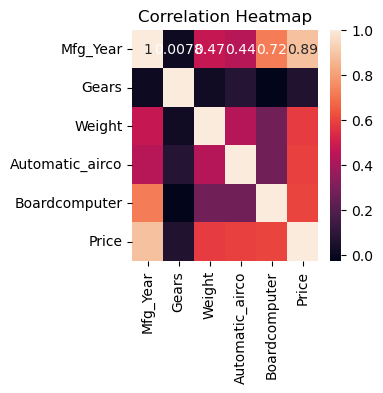

In [60]:
plt.figure(figsize=(3,3))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Figure size 200x200 with 0 Axes>

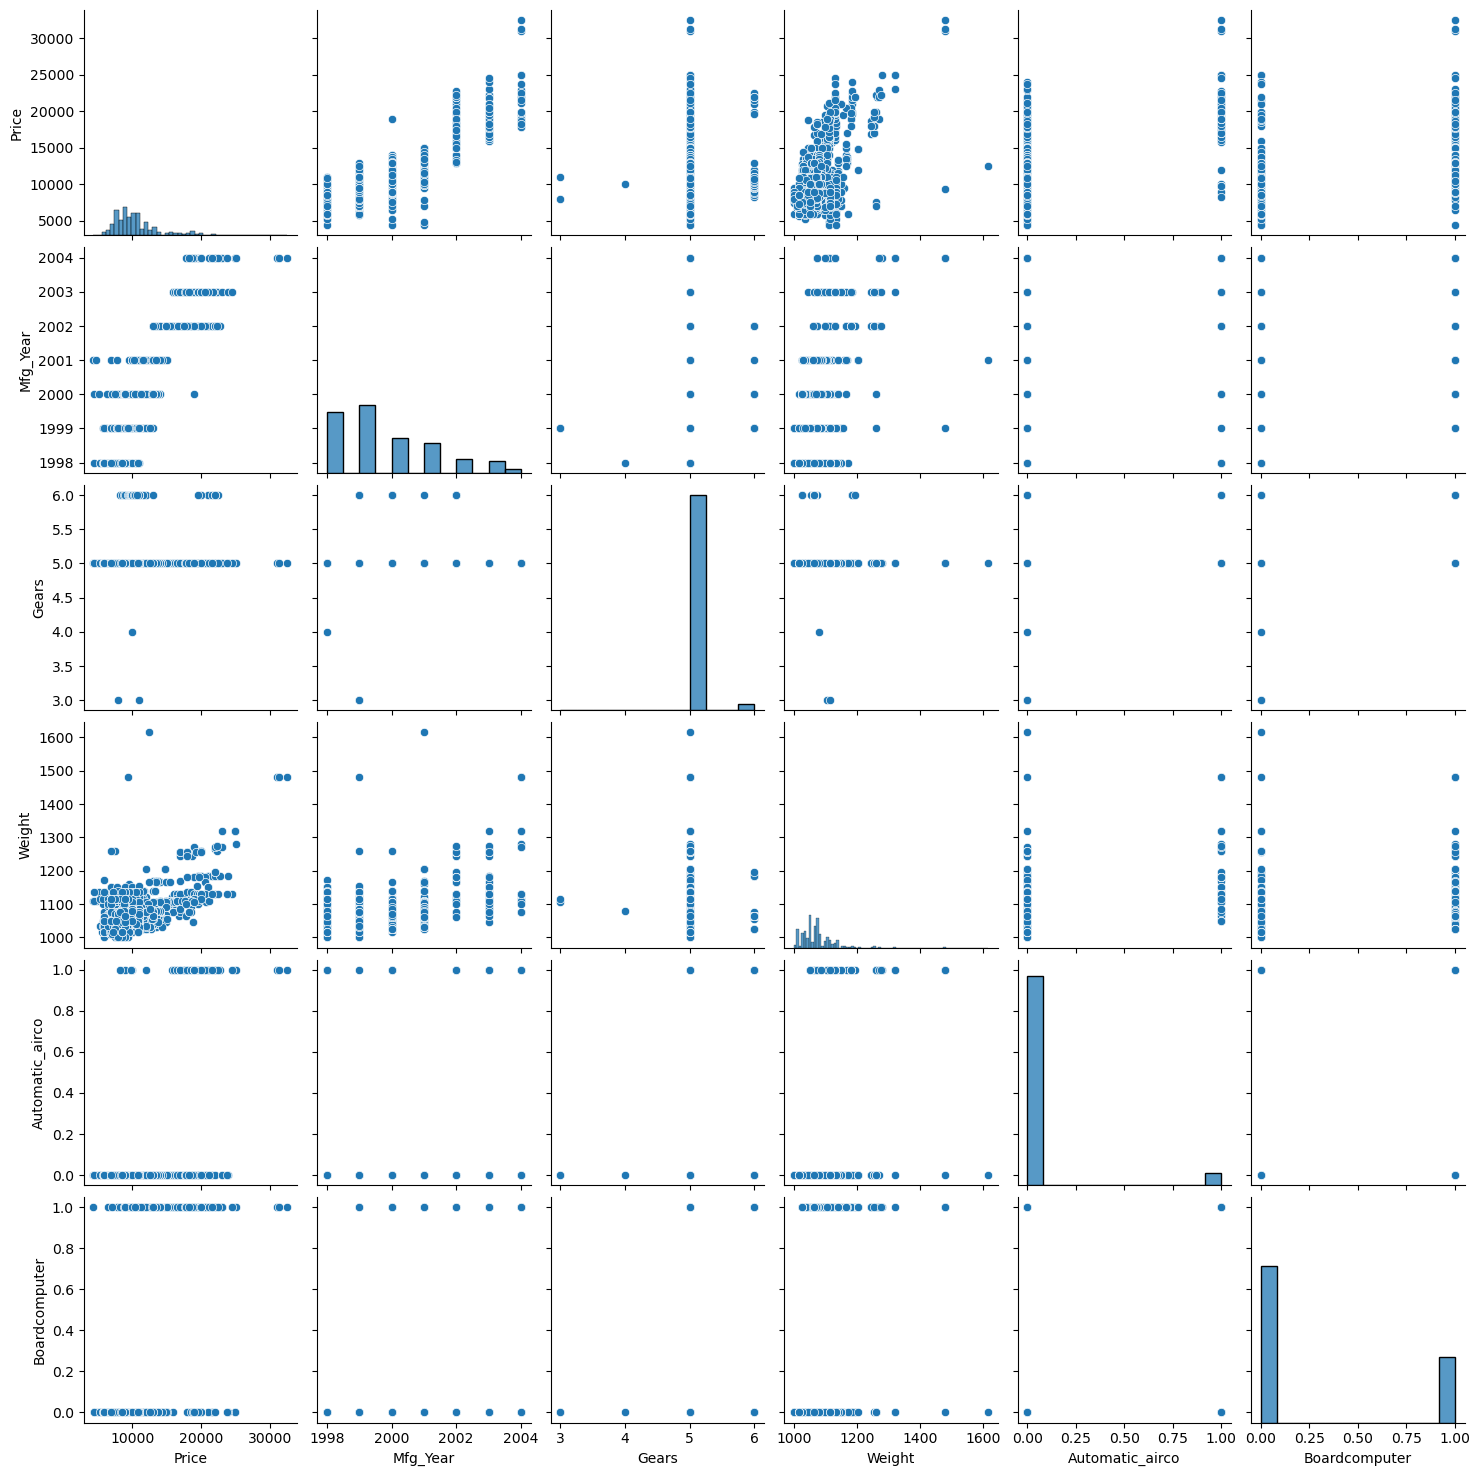

In [61]:
plt.figure(figsize=(2,2))
sns.pairplot(df, kind='scatter')

In [62]:
# We are Splitting , Training & Testing the module - 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 ,random_state=42)

In [63]:
X_train.shape , y_train.shape

((1005, 5), (1005,))

In [64]:
X_test.shape , y_test.shape

((431, 5), (431,))

In [65]:
y_train.head()

451     11750
390      7750
578     11500
1150     9500
1235     7950
Name: Price, dtype: int64

In [ ]:
## Training the Model with multivariable regression using Scikit Learn

# In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output

In [66]:
model = LinearRegression()
model

LinearRegression()

In [67]:
model_train = model.fit(X_train,y_train)

In [68]:
pred = model.predict(X_test)

In [69]:
from sklearn.metrics import r2_score,mean_absolute_error
import math

In [70]:
r2_score(y_test,pred)

0.8494065200744028

In [71]:
model.coef_

array([1798.10339274,  718.62705751,    9.61587842, 3062.38761579,
       -374.42496098])

In [72]:
model.intercept_

-3598783.02044252

In [75]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))

Mean Absolute Error: 1037.7632490938947


C:\Users\DELL\AppData\Local\Temp\ipykernel_14228\4263038450.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

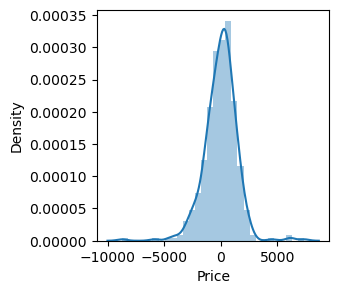

In [76]:
plt.figure(figsize=(3,3))
residuals = y_test-pred
sns.distplot(residuals, bins=30)